# Trabajando con índices temporales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Para esta sesión trabajaremos con datos `csv` descargados de http://clicom-mex.cicese.mx/. Los archivos se llaman:

* `14066-GUADALAJARA (DGE)-JAL-Tprom.csv`

* `14066-GUADALAJARA (DGE)-JAL-Precip.csv`

Y corresponden a la temperatura promedio y precipitación de una estación meteorológica en Guadalajara.

Cargamos los datos incluyendo `header=7` para que __Pandas__ ignore las siete primeras líneas. 

In [2]:
tpro = pd.read_csv("14066-GUADALAJARA (DGE)-JAL-Tprom.csv", header=7)
prec = pd.read_csv("14066-GUADALAJARA (DGE)-JAL-Precip.csv", header=7)

Imprimimos las primeras cinco observaciones usando `head()`.

In [3]:
tpro.head()

,Mes,Día,Anio,Datos
0,9,1,1930,22.0
1,9,2,1930,21.5
2,9,3,1930,21.5
3,9,4,1930,21.5
4,9,5,1930,22.0


Con esta información podemos hacer una gráfica:

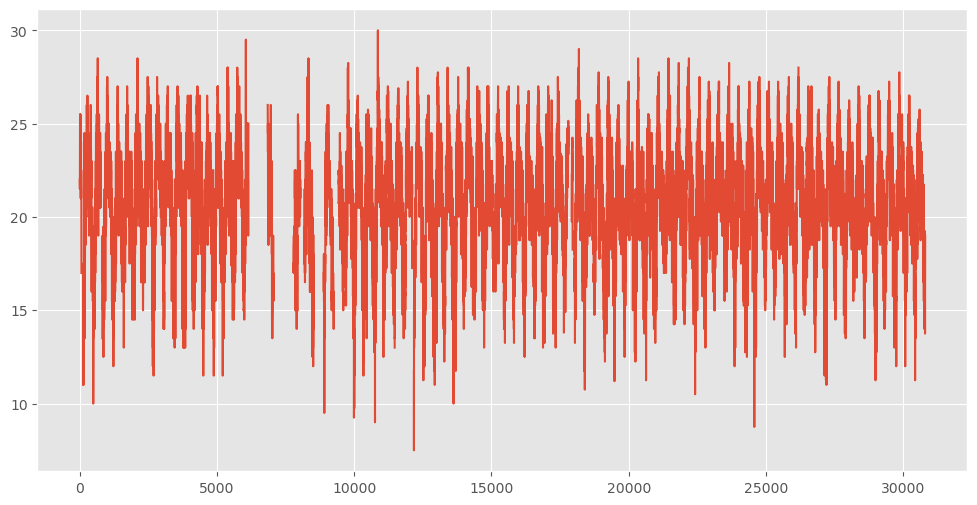

In [4]:
tpro.Datos.plot(figsize=(12,6));

Nótese los espacios vacíos de fechas donde los datos no están disponibles y que el eje de las `x` tiene solo un número consecutivo (el índice).

__Pandas__ trabaja muy bien con datos de fechas, pero hay que colocar esa información en un formato que pandas lo entienda. Haremos un valor siguiendo el formato AAAAMMDD y lo convertiremos a un dato tipo fecha usando:

    pd.to_datetime(tpro.Anio*10000 + tpro.Mes * 100 + tpro.Día,format='%Y%m%d')
    
y lo guardaremos en un campo llamado Fecha.

In [5]:
tpro['Fecha'] = pd.to_datetime(tpro.Anio*10000 + tpro.Mes * 100 + tpro.Día,format='%Y%m%d')
prec['Fecha'] = pd.to_datetime(prec.Anio*10000 + prec.Mes * 100 + prec.Día,format='%Y%m%d')
tpro.head()

,Mes,Día,Anio,Datos,Fecha
0,9,1,1930,22.0,1930-09-01
1,9,2,1930,21.5,1930-09-02
2,9,3,1930,21.5,1930-09-03
3,9,4,1930,21.5,1930-09-04
4,9,5,1930,22.0,1930-09-05


Ahora, lo seleccionamos como índice, usando:

In [6]:
tpro.set_index('Fecha', inplace=True)
prec.set_index('Fecha', inplace=True)
tpro.head()

,Mes,Día,Anio,Datos
Fecha,,,,
1930-09-01,9,1,1930,22.0
1930-09-02,9,2,1930,21.5
1930-09-03,9,3,1930,21.5
1930-09-04,9,4,1930,21.5
1930-09-05,9,5,1930,22.0


Podemos borrar los campos que no utilizaremos con:

In [7]:
tpro.drop(['Día','Mes','Anio'], axis=1, inplace=True)
prec.drop(['Día','Mes','Anio'], axis=1, inplace=True)
tpro.head()

,Datos
Fecha,
1930-09-01,22.0
1930-09-02,21.5
1930-09-03,21.5
1930-09-04,21.5
1930-09-05,22.0


La gran ventaja de utilizar el tiempo como índice es que podemos filtrar los datos directamente:

In [8]:
tpro.loc['1980-02-15']

Datos    18.25
Name: 1980-02-15 00:00:00, dtype: float64

In [9]:
tpro.loc['1980-02-01':'1980-02-15']

,Datos
Fecha,
1980-02-01,18.25
1980-02-02,18.75
1980-02-03,19.75
1980-02-04,17.75
1980-02-05,15.75
1980-02-06,18.25
1980-02-07,17.75
1980-02-08,17.75
1980-02-09,20.25


El tipo de dato `datetime` es un tipo como `int` o `float` y tiene sus propias características.

In [10]:
tpro.index.year

Index([1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930,
       ...
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
      dtype='int32', name='Fecha', length=30803)

In [11]:
tpro.index.month

Index([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Fecha', length=30803)

In [12]:
tpro.index.day

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', name='Fecha', length=30803)

In [13]:
tpro.index.dayofyear

Index([244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       ...
       356, 357, 358, 359, 360, 361, 362, 363, 364, 365],
      dtype='int32', name='Fecha', length=30803)

Para trabajar con estos índices resulta práctico declarar las siguientes funciones:

In [14]:
filtro_dia = lambda x: x.day
filtro_mes = lambda x: x.month
filtro_año = lambda x: x.year
filtro_dia_del_año = lambda x: x.dayofyear

Por ejemplo, para obtener la temperatura promedio del primero de julio:

In [15]:
dia = 4
mes = 7

t_dia = tpro[(tpro.index.map(filtro_dia) == dia) & (tpro.index.map(filtro_mes) == mes)].Datos.mean()
print("La temperatura pomedio para el {} del mes {} ha sido {:.1f}°C".format(dia, mes, t_dia))

La temperatura pomedio para el 4 del mes 7 ha sido 22.1°C


In [16]:
t_dia = tpro[(tpro.index.map(filtro_dia_del_año) == 185)].Datos.mean()
print("La temperatura pomedio para el dia 185 ha sido {:.1f}°C".format(t_dia))

La temperatura pomedio para el dia 185 ha sido 22.2°C


### Agrupando datos con groupby()

El método `groupby()` nos permite agrupar los datos según algún dato. El resultado es un objeto `groupby` que necesita alguna función de _agregación_.

In [17]:
tpro.groupby(filtro_dia_del_año)

In [18]:
tpro.groupby(filtro_dia_del_año).mean().head(10)

,Datos
Fecha,
1,16.688667
2,16.672368
3,16.912500
4,17.151316
5,17.072667
6,17.042763
7,16.912500
8,16.992763
9,16.936184


In [19]:
tpro.groupby(filtro_dia_del_año).max().head(10)

,Datos
Fecha,
1,20.00
2,20.00
3,20.25
4,20.00
5,20.00
6,20.50
7,20.00
8,20.00
9,20.50


In [20]:
tpro.groupby(filtro_dia_del_año).min().head(10)

,Datos
Fecha,
1,11.75
2,7.50
3,11.20
4,13.00
5,11.00
6,10.00
7,9.25
8,9.75
9,12.00


<Axes: title={'center': 'Temperatura promedio'}, xlabel='Fecha'>

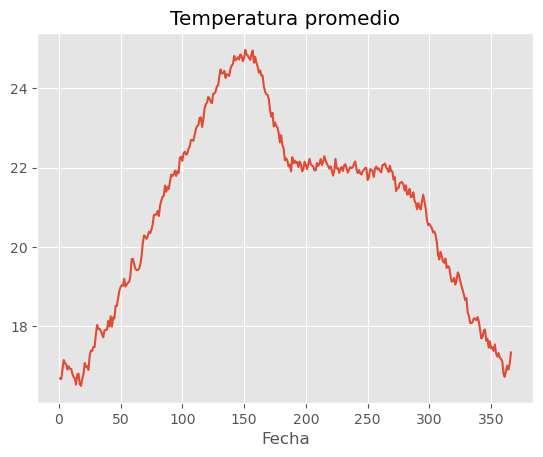

In [21]:
tpro.Datos.groupby(filtro_dia_del_año).mean().plot(title='Temperatura promedio')

<Axes: title={'center': 'Precipitación'}, xlabel='Fecha'>

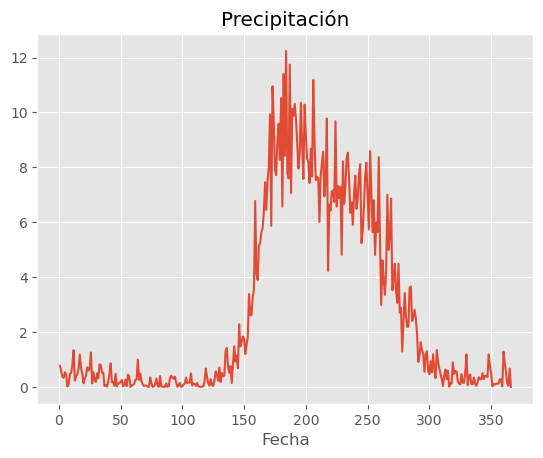

In [22]:
prec.Datos.groupby(filtro_dia_del_año).mean().plot(title='Precipitación')

Text(0.5, 1.0, 'Temperatura promedio')

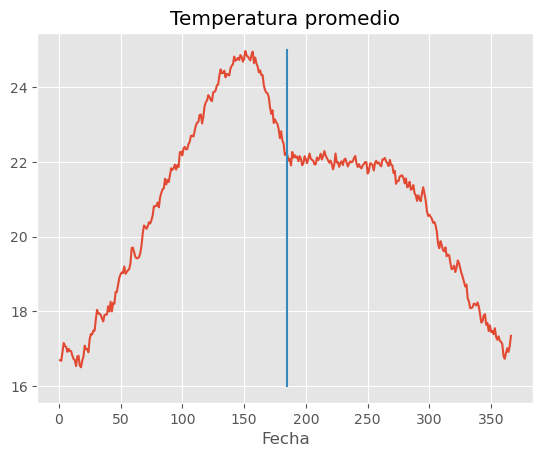

In [23]:
tpro.Datos.groupby(filtro_dia_del_año).mean().plot()
plt.plot((185, 185), (16, 25))
plt.title("Temperatura promedio")

Text(0.5, 1.0, 'Precipitación')

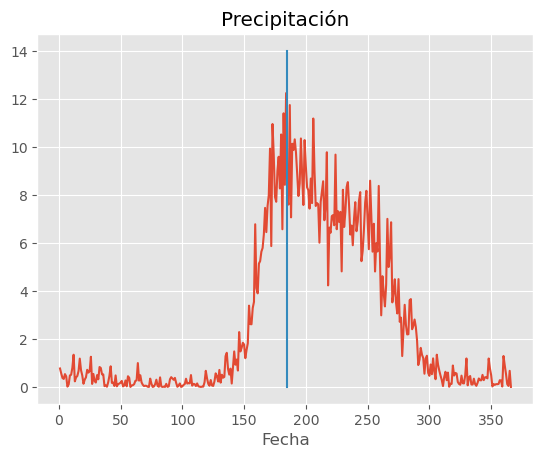

In [24]:
prec.Datos.groupby(filtro_dia_del_año).mean().plot()
plt.plot((185,185), (0, 14))
plt.title("Precipitación")

Otro ejemplo, la temperatura promedio por año:

<Axes: xlabel='Fecha'>

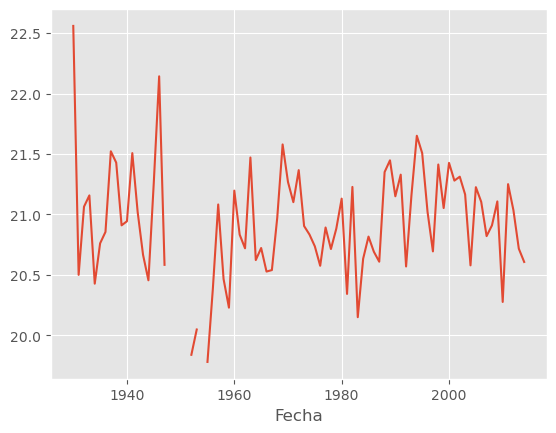

In [25]:
tpro.Datos.groupby(filtro_año).mean().plot()
